# Motivation

In this assignment, we'll be performing basic EDA on three different datasets to gain a wider perspective. We'll be building up on this work by later doing feature engineering and feature selection on these datasets, and hopefully your experience in EDA will give you ideas about how to do it well.

Here are the three datasets and the basic facts about them:

* Predicting Conversion (Conversion Rate)
    - Binary Classification
    - 5 features (2 categorical)
* Employee Retention
    - Regression
    - 6 features (2 categorical)
    - two timestamps
* Identifying Fraudulent Activities
    - Binary Classification
    - 10 features (8 categorical)
    

# Task 1: Exploratory Data Analysis for Conversion Rate Dataset

## a. Function that returns a list of the names of categorical variables

### Input:

Type: dataframe

### Output:

Type: list

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: ["sex", "Pclass", ...]

In [1]:
filepath = "/home/satyabrat/Downloads/conversion_data.csv"

In [2]:
import pandas as pd

data = pd.read_csv(filepath)
df = pd.DataFrame(data)
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df._get_numeric_data().columns

Index([u'age', u'new_user', u'total_pages_visited', u'converted'], dtype='object')

In [80]:
# check for variables having non_numeric entries or numeric entries limited to a few values(preferably less than 4)
def categorical_variable(dataframe):
    list1 = []
    for i in dataframe:
        if len(set(dataframe[i].values)) <= 4 or i not in dataframe._get_numeric_data().columns:
            list1.append(i)
    return list1

In [81]:
categorical_variable(df)

['country', 'new_user', 'source', 'converted']

## b. Function that returns the list of the names of numeric variables

### Input:

Type: dataframe

### Output:

Type: list

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: ["fare", "age", ...]

In [104]:
def numeric_variable(dataframe):
    list2 = [i for i in dataframe if i not in categorical_variable(dataframe)]
    return list2

In [105]:
numeric_variable(df)

['age', 'total_pages_visited']

## c. Function that reutrns, for numeric variables, mean, median, 25, 50, 75th percentile 

### Input:

Type: dataframe

### Output:

Type: dataframe with 

columns:

* variable name
* mean
* median
* 25th percentile
* 50th percentile
* 75th percentile

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: dataframe

In [8]:
def stats(dataframe):
    dataframe = dataframe[numeric_variable(dataframe)].copy()
    stats_df = dataframe.quantile([0.25, 0.5, 0.75])
    stats_df = stats_df.T
    stats_df["mean"] = dataframe.mean()
    stats_df["median"] = stats_df[0.5]
    stats_df = stats_df.reset_index()
    stats_df = stats_df.rename(columns={"index": "variable name", 0.25: "25th percentile", 0.5: "50th percentile", 0.75: "75th percentile"})
    return stats_df

In [9]:
stats(df)

,variable name,25th percentile,50th percentile,75th percentile,mean,median
0,age,24.0,30.0,36.0,30.569858,30.0
1,total_pages_visited,2.0,4.0,7.0,4.872966,4.0


## d. For categorical variables, get modes

### Input:

Type: dataframe

### Output:

Type: dict

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: {"Pclass": 28, "Sex": 1, ...}

In [10]:
def mode(dataframe):   
    dict1 = {}
    for i in dataframe[categorical_variable(dataframe)]:
         frequency = dataframe[i].value_counts()
         mode = frequency.idxmax()
         dict1[i] = mode
    return dict1

In [11]:
mode(df)

{'converted': 0, 'country': 'US', 'new_user': 1, 'source': 'Seo'}

## e. For each column, list the count of missing values

### Input:

Type: dataframe

### Output:

Type: dataframe with 

columns

* var_name
* missing_value_count

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: dataframe

In [12]:
def missing_value_count(dataframe):
    counts_df = dataframe.isnull().sum()
    counts_df = counts_df.reset_index()
    counts_df = counts_df.rename(columns={"index": "var_name", 0: "missing_value_count"})
    return counts_df

In [13]:
missing_value_count(df)

,var_name,missing_value_count
0,country,0
1,age,0
2,new_user,0
3,source,0
4,total_pages_visited,0
5,converted,0


## f. Plot histograms using different subplots of all the numerical values in a single plot

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

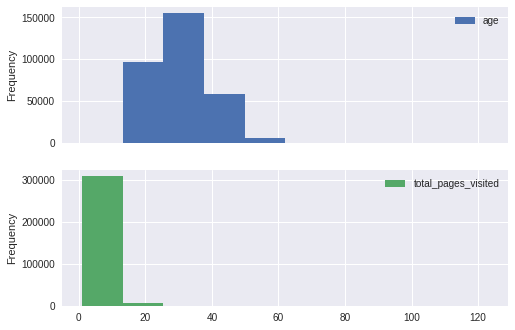

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


df[numeric_variable(df)].plot(subplots=True,kind = 'hist')
plt.show()

### f.a. Add column names as plot names 

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

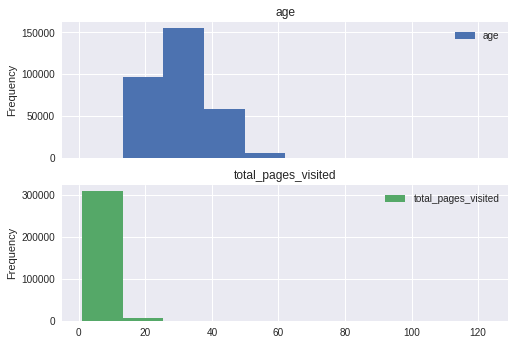

In [73]:
df[numeric_variable(df)].plot(subplots=True,kind = 'hist',title = numeric_variable(df) )
plt.show()

### f.b. Change the histogram colour to yellow

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

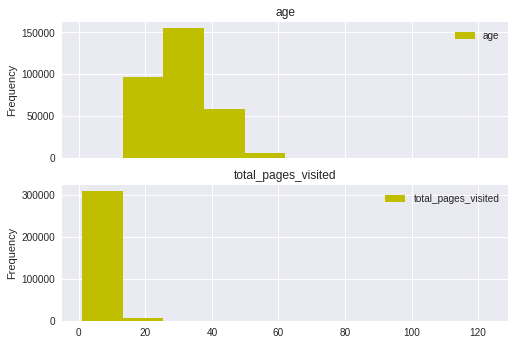

In [118]:
df[numeric_variable(df)].plot(subplots=True,kind = 'hist', title = numeric_variable(df), color = "y")
plt.show()

### f.c. Fit a normal curve on those histograms

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

## g. Plot facet box plots to check out the distribution according to the target variable

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["sex", "Pclass", ...]
* Expected output: matplotlib plot

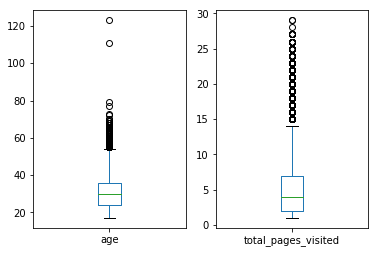

In [35]:
df[numeric_variable(df)].plot(subplots=True,kind = 'box')
plt.show()

# Task 2: EDA for Employee Retention Dataset


## a. Function that returns a list of the names of categorical variables

### Input:

Type: dataframe

### Output:

Type: list

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: ["sex", "Pclass", ...]

In [76]:
filepath_1 = "/home/satyabrat/Downloads/employee_retention_data.csv"

In [77]:
data1 = pd.read_csv(filepath_1)
df1 = pd.DataFrame(data1)
df1.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [84]:
categorical_variable(df1)

['dept', 'join_date', 'quit_date']

## b. Function that returns the list of the names of numeric variables

### Input:

Type: dataframe

### Output:

Type: list

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: ["fare", "age", ...]

In [85]:
numeric_variable(df1)

['employee_id', 'company_id', 'seniority', 'salary']

## c. Function that reutrns, for numeric variables, mean, median, 25, 50, 75th percentile 

### Input:

Type: dataframe

### Output:

Type: dataframe with 

columns:

* variable name
* mean
* median
* 25th percentile
* 50th percentile
* 75th percentile

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: dataframe

In [86]:
stats(df1)

,variable name,25th percentile,50th percentile,75th percentile,mean,median
0,employee_id,250133.75,500793.0,753137.25,501604.403530,500793.0
1,company_id,1.00,2.0,5.00,3.426969,2.0
2,seniority,7.00,14.0,21.00,14.127803,14.0
3,salary,79000.00,123000.0,187000.00,138183.345478,123000.0


## d. For categorical variables, get modes

### Input:

Type: dataframe

### Output:

Type: dict

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: {"Pclass": 28, "Sex": 1, ...}

In [87]:
mode(df1)

{'dept': 'customer_service',
 'join_date': '2012-01-03',
 'quit_date': '2015-05-08'}

## e. For each column, list the count of missing values

### Input:

Type: dataframe

### Output:

Type: dataframe with 

columns

* var_name
* missing_value_count

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: dataframe

In [88]:
missing_value_count(df1)

,var_name,missing_value_count
0,employee_id,0
1,company_id,0
2,dept,0
3,seniority,0
4,salary,0
5,join_date,0
6,quit_date,11192


## f. Plot histograms using different subplots of all the numerical values in a single plot

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

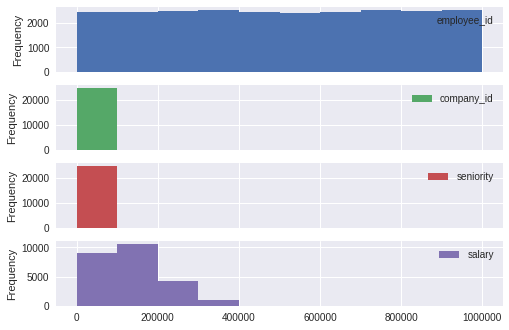

In [89]:
df1[numeric_variable(df1)].plot(subplots=True,kind = 'hist')
plt.show()

### f.a. Add column names as plot names 

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

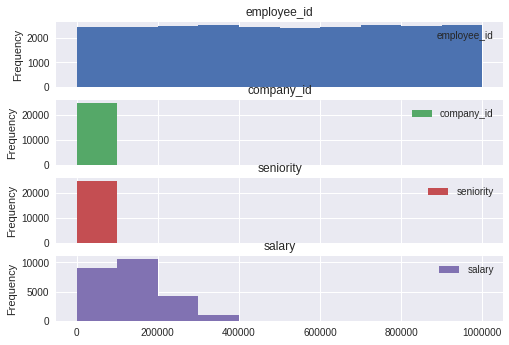

In [90]:
df1[numeric_variable(df1)].plot(subplots=True,kind = 'hist', title = numeric_variable(df1))
plt.show()

### f.b. Change the histogram colour to yellow

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

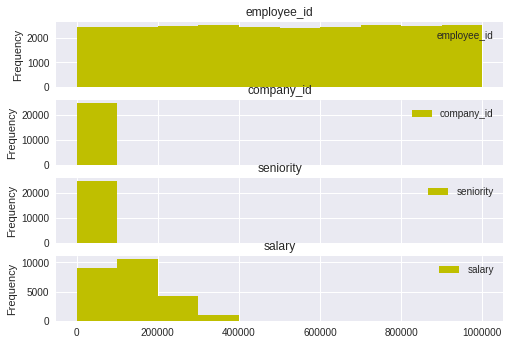

In [91]:
df1[numeric_variable(df1)].plot(subplots=True,kind = 'hist', title = numeric_variable(df1), color = "y" )
plt.show()

### f.c. Fit a normal curve on those histograms

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

# Task 3: EDA for Fradulent Activities Dataset

In [95]:
filepath1 = "/home/satyabrat/Downloads/Translation_Test/test_table.csv"
filepath2 = "/home/satyabrat/Downloads/Translation_Test/user_table.csv"

In [96]:
import pandas as pd

data_test = pd.read_csv(filepath1)
df_test = pd.DataFrame(data_test)
df_test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [97]:
data_user = pd.read_csv(filepath2)
df_user = pd.DataFrame(data_user)
df_user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


## a. Map each user to his country based on his IP address

### Input:

Type: dataframe, dataframe

### Output:

Type: dataframe

### Contrains:

### Test cases:

* Input value: dataframe1, dataframe2
* Expected output: dataframe

In [100]:
df_map = df_user.merge(df_test, on='user_id')
df_map

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0
5,62371,M,29,Ecuador,2015-12-02,Direct,Mobile,ES,NaN,Iphone_App,0,0
6,987967,M,31,Spain,2015-12-04,SEO,Web,ES,NaN,Chrome,0,0
7,499510,F,29,Paraguay,2015-12-04,Ads,Web,EN,Google,FireFox,0,1
8,364726,F,29,Colombia,2015-12-02,Direct,Web,ES,NaN,Chrome,0,1
9,572551,M,21,Bolivia,2015-12-03,SEO,Mobile,EN,NaN,Iphone_App,0,1


## a. Function that returns a list of the names of categorical variables

### Input:

Type: dataframe

### Output:

Type: list

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: ["sex", "Pclass", ...]

In [101]:
categorical_variable(df_map)

['sex',
 'country',
 'date',
 'source',
 'device',
 'browser_language',
 'ads_channel',
 'browser',
 'conversion',
 'test']

## b. Function that returns the list of the names of numeric variables

### Input:

Type: dataframe

### Output:

Type: list

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: ["fare", "age", ...]

In [106]:
numeric_variable(df_map)

['user_id', 'age']

## c. Function that reutrns, for numeric variables, mean, median, 25, 50, 75th percentile 

### Input:

Type: dataframe

### Output:

Type: dataframe with 

columns:

* variable name
* mean
* median
* 25th percentile
* 50th percentile
* 75th percentile

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: dataframe

In [107]:
stats(df_map)

,variable name,25th percentile,50th percentile,75th percentile,mean,median
0,user_id,249819.0,500019.0,749543.0,499944.805166,500019.0
1,age,22.0,26.0,31.0,27.130740,26.0


## d. For categorical variables, get modes

### Input:

Type: dataframe

### Output:

Type: dict

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: {"Pclass": 28, "Sex": 1, ...}

In [108]:
mode(df_map)

{'ads_channel': 'Facebook',
 'browser': 'Android_App',
 'browser_language': 'ES',
 'conversion': 0,
 'country': 'Mexico',
 'date': '2015-12-04',
 'device': 'Web',
 'sex': 'M',
 'source': 'Ads',
 'test': 0}

## e. For each column, list the count of missing values

### Input:

Type: dataframe

### Output:

Type: dataframe with 

columns

* var_name
* missing_value_count

### Contrains:

### Test cases:

* Input value: Titanic dataframe
* Expected output: dataframe

In [109]:
missing_value_count(df_map)

,var_name,missing_value_count
0,user_id,0
1,sex,0
2,age,0
3,country,0
4,date,0
5,source,0
6,device,0
7,browser_language,0
8,ads_channel,271174
9,browser,0


## f. Plot histograms using different subplots of all the numerical values in a single plot

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

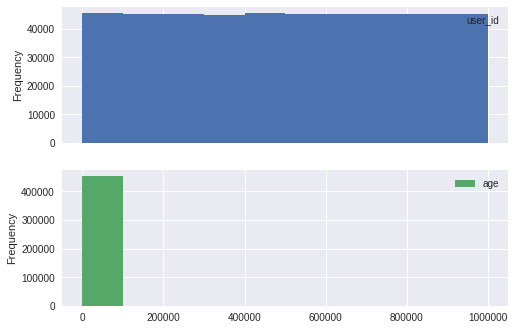

In [111]:
df_map[numeric_variable(df_map)].plot(subplots=True,kind = 'hist')
plt.show()

### f.a. Add column names as plot names 

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

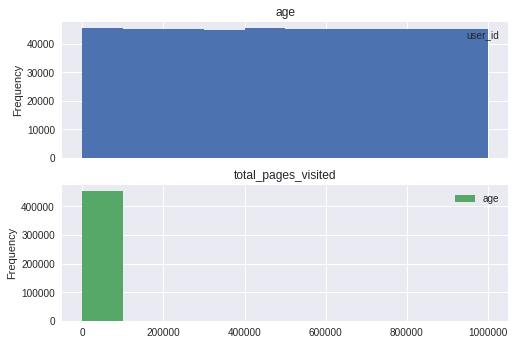

In [112]:
df_map[numeric_variable(df_map)].plot(subplots=True,kind = 'hist',title = numeric_variable(df) )
plt.show()

### f.b. Change the histogram colour to yellow

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

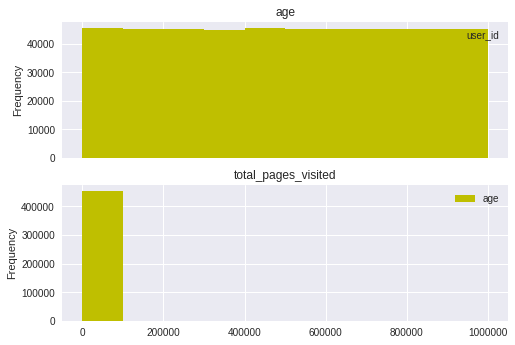

In [113]:
df_map[numeric_variable(df_map)].plot(subplots=True,kind = 'hist',title = numeric_variable(df), color = 'y')
plt.show()

### f.c. Fit a normal curve on those histograms

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["age", "Fare", ...]
* Expected output: matplotlib plot

## g. Plot facet box plots to check out the distribution according to the target variable

### Input:

Type: dataframe, list_of_columns

### Output:

Type: matplotlib plot

### Contrains:

### Test cases:

* Input value: Titanic dataframe, ["sex", "Pclass", ...]
* Expected output: matplotlib plot

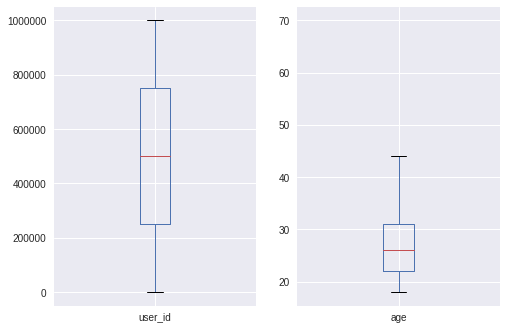

In [114]:
df_map[numeric_variable(df_map)].plot(subplots=True,kind = 'box')
plt.show()